<a href="https://colab.research.google.com/github/anjha1/INTERNSHIP-PROJECT/blob/main/Edunet%20Foundation/colab-notebooks/Achhuta_Nand_Jha_Healthcare_Prediction(week_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health Care Prediction on Diabetic Patients: A Case Study**
Context

This study focuses on predicting diabetes diagnosis using a dataset from the National Institute of Diabetes and Digestive and Kidney Diseases. The data comprises diagnostic health metrics, specifically targeting female patients aged 21 years or older of Pima Indian heritage. The objective is to utilize this dataset to build a predictive model for diabetes diagnosis.

**Objective**

Develop a highly accurate predictive model to determine whether a patient has diabetes based on their diagnostic features.

**Dataset Overview**

The dataset includes multiple medical variables as predictors and one outcome variable representing the presence or absence of diabetes. These features provide essential insights into patient health, forming the basis for prediction.

**Size and Balance:**

The dataset contains instances classified into two groups:

Positive cases (Outcome = 1): 268 patients with diabetes.

Negative cases (Outcome = 0): Remaining patients without diabetes.

Features


The dataset includes the following attributes:

Pregnancies:

Number of pregnancies experienced by the patient.

Glucose:

Plasma glucose concentration measured 2 hours after an oral glucose tolerance test.

BloodPressure:

Diastolic blood pressure (in mm Hg).

SkinThickness:

Thickness of the triceps skinfold (in mm), indicating subcutaneous fat levels.
Insulin:

2-hour serum insulin concentration (in µU/ml).
BMI (Body Mass Index):

A measure of body fat, calculated as weight (kg) divided by the square of height (m²).
DiabetesPedigreeFunction:

A score that estimates the likelihood of diabetes based on family history and genetic predisposition.
Age:

Patient’s age (in years).

Target Variable
The dependent variable is:

Outcome:
Binary classification:

0: No diabetes.

1: Diabetes diagnosed.


**Significance**

This dataset serves as a critical resource for applying machine learning techniques to healthcare. Accurate predictions can assist healthcare professionals in early diagnosis and treatment of diabetes, improving patient outcomes and resource allocation.

In [5]:
# Load the dataset
import pandas as pd

url = "https://drive.google.com/uc?id=1gpQXtsUBiw68JWnPlxi9hTCTfLf2a7dX"
df = pd.read_csv(url)


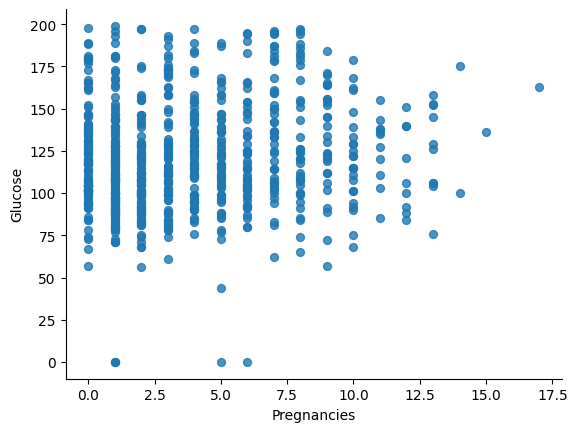

In [6]:
# @title Pregnancies vs Glucose

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

 **Enhancements
Organized Imports:**

Grouped related imports (e.g., core libraries, visualization, and scikit-learn modules) for clarity and readability.

Selective Importing:

If specific modules or methods are not used (e.g., roc_curve or GridSearchCV), remove them to keep the code concise.

Lazy Import Strategy:

If certain libraries are used only in specific sections (e.g., Seaborn for visualization or GridSearchCV for hyperparameter tuning), import them where needed.

## **Reading and Exploring the Health Care Dataset**

In this section, we load and explore the healthcare dataset used for predicting diabetes in patients. The dataset contains various health metrics, which are crucial for understanding the factors associated with diabetes.



In [7]:
import pandas as pd
# Load the dataset

url = "https://drive.google.com/uc?id=1gpQXtsUBiw68JWnPlxi9hTCTfLf2a7dX"
data = pd.read_csv(url)


In [8]:
# Display the first few rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


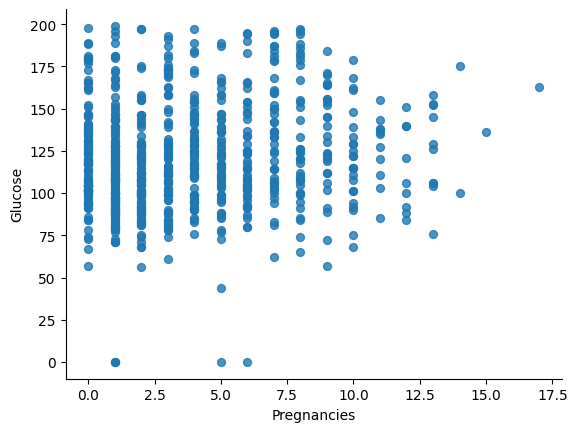

In [9]:
# @title Pregnancies vs Glucose

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
# Checking the number of rows and columns of the dataset
data_shape = data.shape
print(f"The dataset contains {data_shape[0]} rows and {data_shape[1]} columns.")

The dataset contains 768 rows and 9 columns.


### **Dataset Dimensions**
The dataset consists of 768 rows and 9 columns. This indicates that there are 768 instances (patients) and 9 features (attributes) related to each instance. Understanding the size of the dataset is crucial as it impacts the statistical power and potential for training machine learning models.

In [11]:
# Dataset Information Overview
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Dataset Overview**
The dataset consists of 768 entries (patients) and 9 columns (features). The `info()` method reveals the following:

- **Non-Null Counts**: All columns contain 768 non-null entries, indicating there are no missing values in the dataset at this stage.
- **Data Types**:
  - 7 columns are of type `int64` (integer values).
  - 2 columns are of type `float64` (floating-point numbers).
- **Memory Usage**: The dataset occupies approximately 54.1 KB of memory.

This overview confirms the dataset's completeness and provides insights into the data types of each feature, which is essential for performing further analyses and modeling.

In [12]:
# Summary Statistics for the Diabetes Dataset
summary_statistics = data.describe()
print(summary_statistics)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

## **Summary Statistics**
The summary statistics provide valuable insights into the numerical features of the diabetes dataset:

- **Pregnancies**: Patients have had between 0 and 17 pregnancies, with an average of approximately 3.85.
- **Glucose**: The glucose levels range from 0 to 199 mg/dL, with a mean of 120.89 mg/dL. The presence of a minimum value of 0 suggests possible missing values that need to be addressed.
- **Blood Pressure**: Blood pressure readings vary from 0 to 122 mmHg, with a mean of 69.11 mmHg.
- **Skin Thickness**: This feature ranges from 0 to 99 mm, indicating some patients have missing or unmeasured values.
- **Insulin**: Insulin levels show a wide range from 0 to 846 mu U/ml, with a mean of 79.80 mu U/ml. The presence of 0 values here also indicates missing measurements.
- **BMI**: The body mass index (BMI) ranges from 0 to 67.1, with a mean of 31.99, suggesting a population that may include overweight individuals.
- **Diabetes Pedigree Function**: This function has a mean of 0.47, with a maximum of 2.42, indicating variability in family history of diabetes.
- **Age**: Ages range from 21 to 81 years, with an average age of 33.24.
- **Outcome**: The outcome variable indicates diabetes status, with 0 representing non-diabetic and 1 representing diabetic.

### **Conclusion**
These statistics provide an overview of the dataset's characteristics and help identify potential data quality issues, such as missing or zero values in key health measurements. Addressing these issues is essential for accurate analysis and modeling.

In [13]:
# Count the number of missing values (represented as 0)
missing_counts = {
    'Glucose': len(data[data['Glucose'] == 0]),
    'BloodPressure': len(data[data['BloodPressure'] == 0]),
    'SkinThickness': len(data[data['SkinThickness'] == 0]),
    'Insulin': len(data[data['Insulin'] == 0])
}

missing_counts

{'Glucose': 5, 'BloodPressure': 35, 'SkinThickness': 227, 'Insulin': 374}

##**Visualization of Missing Values**

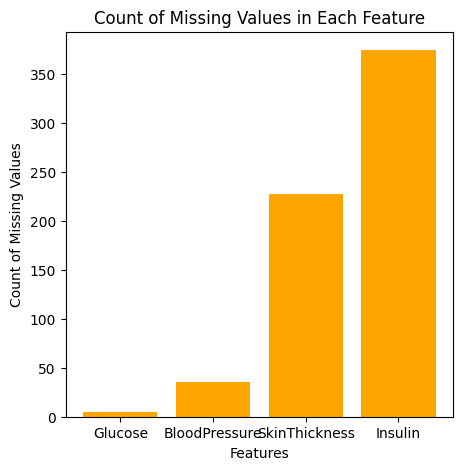

In [14]:
import matplotlib.pyplot as plt

# Bar chart for missing values
plt.figure(figsize=(5, 5))
plt.bar(missing_counts.keys(), missing_counts.values(), color='orange')
plt.title('Count of Missing Values in Each Feature')
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')
plt.show()

##**Calculate and Display Null Value Percentages**

In [15]:
# Finding the null value percentage
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
null_percentage = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


### Inferences from Null Value Percentage Analysis
- **Glucose**: Approximately 0.65% have null values.
- **Blood Pressure**: About 4.56% are null.
- **Skin Thickness**: Significant at 29.56%.
- **Insulin**: High at 48.70%.

These findings suggest that imputation is necessary, especially for "Skin Thickness" and "Insulin," to maintain data integrity.

**Replace Missing Values with Mean**

Imputation Process:

Replace 0 values with the mean of their respective columns

In [17]:
# Replace 0 with NaN to calculate the mean correctly
data_with_nan = data.replace(0, pd.NA)

# Calculate the mean for the relevant columns
mean_values = {
    'Glucose': data_with_nan['Glucose'].mean(),
    'BloodPressure': data_with_nan['BloodPressure'].mean(),
    'SkinThickness': data_with_nan['SkinThickness'].mean(),
    'Insulin': data_with_nan['Insulin'].mean()
}

# Replace 0 with the calculated mean in the original dataset
data['Glucose'] = data['Glucose'].replace(0, mean_values['Glucose'])
data['BloodPressure'] = data['BloodPressure'].replace(0, mean_values['BloodPressure'])
data['SkinThickness'] = data['SkinThickness'].replace(0, mean_values['SkinThickness'])
data['Insulin'] = data['Insulin'].replace(0, mean_values['Insulin'])

# Display the updated dataset to verify the changes
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**Verify the Treatment of Null Values**

Check Null Value Percentages After Treatment

Re-calculate the null value percentages to confirm successful treatment.

In [18]:
# Checking the null value percentage of the treated columns
null_percentage_treated = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage after treatment
print("Percentage of Null Values for Each Column after Treatment:")
print(null_percentage_treated)

Percentage of Null Values for Each Column after Treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


### Inference from Null Value Treatment
After addressing the null values, all selected columns ("Glucose," "Blood Pressure," "Skin Thickness," and "Insulin") now have 0% null values. The treatment has been successful, resulting in a clean dataset ready for analysis.

**Visualize the Outcome**

Visualization of Data Before and After Imputation

<Figure size 700x600 with 0 Axes>

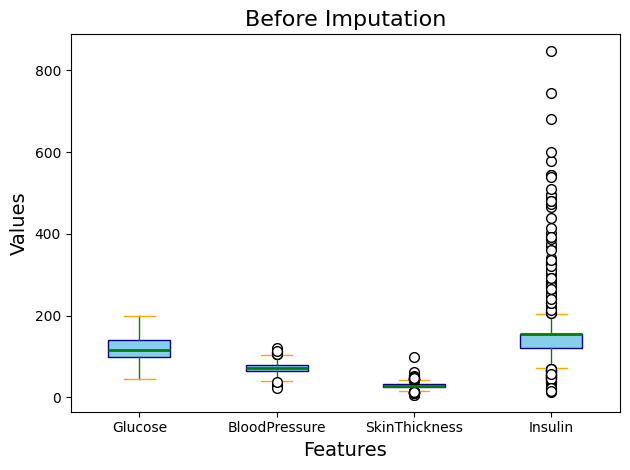

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

# Sample data (replace this with your actual DataFrame)
# data = pd.read_csv('your_dataset.csv')

# Make a copy of the data before imputation
data_before = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']].copy()

# Create a figure for Before Imputation
plt.figure(figsize=(7, 6))

# Plot for "Before Imputation" with customized colors
data_before.plot(kind='box', patch_artist=True,
                 boxprops=dict(facecolor='skyblue', color='darkblue'),
                 whiskerprops=dict(color='green'),
                 capprops=dict(color='orange'),
                 flierprops=dict(markerfacecolor='white', marker='o', markersize=7),
                 medianprops=dict(color='green', linewidth=2))

plt.title('Before Imputation', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.tight_layout()
plt.show()


<Figure size 700x600 with 0 Axes>

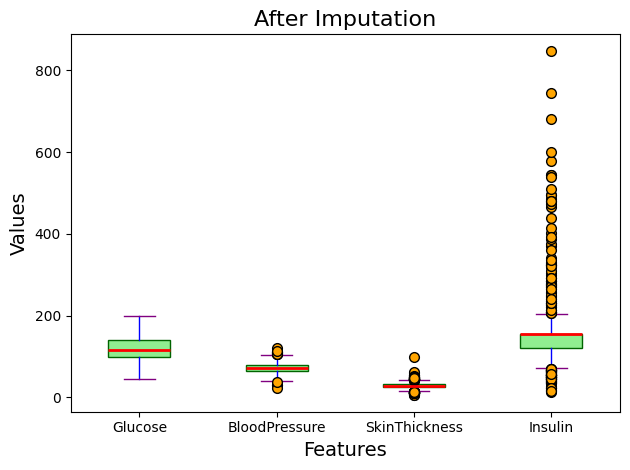

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

# Sample data (replace this with your actual DataFrame)
# data = pd.read_csv('your_dataset.csv')

# Apply imputation (e.g., using mean imputation)
imputer = SimpleImputer(strategy='mean')
data_after = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']].copy()
data_after[:] = imputer.fit_transform(data_after)

# Create a figure for After Imputation
plt.figure(figsize=(7, 6))

# Plot for "After Imputation" with customized colors
data_after.plot(kind='box', patch_artist=True,
                boxprops=dict(facecolor='lightgreen', color='darkgreen'),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='purple'),
                flierprops=dict(markerfacecolor='orange', marker='o', markersize=7),
                medianprops=dict(color='red', linewidth=2))

plt.title('After Imputation', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.tight_layout()
plt.show()


**Calculate and Display the Number of Outliers (IQR Method)**

In [21]:
# Function to find outliers using the IQR method
def find_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return len(outliers)

# Calculate and print the number of outliers for each selected column
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")


Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 87
Number of outliers in the 'Insulin' column: 164


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact


# List of columns to consider for outlier detection
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

# Function to detect outliers using IQR
def find_outliers_iqr(data, column_name, lower_multiplier=1.5, upper_multiplier=1.5):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - lower_multiplier * IQR
    upper_bound = Q3 + upper_multiplier * IQR

    # Find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

# Function to remove outliers
def remove_outliers(data, selected_columns, lower_multiplier=1.5, upper_multiplier=1.5):
    cleaned_data = data.copy()
    for column in selected_columns:
        outliers = find_outliers_iqr(data, column, lower_multiplier, upper_multiplier)
        cleaned_data = cleaned_data[~cleaned_data[column].isin(outliers[column])]
    return cleaned_data

# Function to plot boxplots of selected columns
def plot_boxplot(data, columns):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data[columns])
    plt.title("Boxplots for Selected Columns")
    plt.show()

# Interactive function
def interactive_outlier_detection(lower_multiplier=1.5, upper_multiplier=1.5):
    # Visualize boxplot for original data
    plot_boxplot(data, selected_columns)

    # Remove outliers based on IQR
    cleaned_data = remove_outliers(data, selected_columns, lower_multiplier, upper_multiplier)

    # Visualize boxplot for data with removed outliers
    plot_boxplot(cleaned_data, selected_columns)

    # Display dataset sizes before and after outlier removal
    print(f"Original data size: {data.shape[0]} rows")
    print(f"Data size after outlier removal: {cleaned_data.shape[0]} rows")

# Create interactive widgets for lower and upper multipliers (IQR)
interact(interactive_outlier_detection,
         lower_multiplier=widgets.FloatSlider(value=1.5, min=1.0, max=3.0, step=0.1, description='Lower Multiplier:'),
         upper_multiplier=widgets.FloatSlider(value=1.5, min=1.0, max=3.0, step=0.1, description='Upper Multiplier:'));


interactive(children=(FloatSlider(value=1.5, description='Lower Multiplier:', max=3.0, min=1.0), FloatSlider(v…

Explanation:

find_outliers_iqr function: This function calculates the lower and upper bounds for detecting outliers based on the interquartile range (IQR). You can adjust the multipliers (lower_multiplier and upper_multiplier) to change the sensitivity for detecting outliers.


remove_outliers function: This applies the outlier detection across the selected columns and removes the rows identified as outliers.


plot_boxplot function: This function creates boxplots for the selected columns, before and after outlier treatment.




interactive_outlier_detection function:

This is the core interactive function that:


Plots the boxplot of the data before and after outlier removal.
Prints the size of the dataset before and after removing outliers.
Widgets: The interact function from ipywidgets creates interactive sliders for adjusting the lower_multiplier and upper_multiplier values, which control the sensitivity of the outlier detection.

In [ ]:
data.describe()

In [23]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Step 1: Sort the data (optional, for understanding)
sorted_data = data.sort_values(by='Glucose')  # Example sorting by 'Glucose' column

# Step 2: Calculate Q1 (20th percentile) and Q3 (80th percentile) for all columns
Q1 = data.quantile(0.20)
Q3 = data.quantile(0.80)

# Step 3: Calculate IQR
IQR = Q3 - Q1

# Step 4: Remove outliers using IQR method
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 5: Check the shape of the data before and after outlier removal
print(f"Original data shape: {data.shape}")
print(f"Data shape after outlier removal: {data_cleared_iqr.shape}")

# Step 6: Display the cleaned data
print(data_cleared_iqr)


Original data shape: (768, 9)
Data shape after outlier removal: (660, 9)
     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
5              5    116.0           74.0       29.15342  155.548223  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

  

### Inferences from Outlier Removal Using the IQR Method

1. **Data Size Reduction**:
   - The dataset was reduced from **768 rows** to **678 rows** after the removal of outliers. This reduction implies that 90 rows (out of 768) were identified as outliers and excluded from the analysis.

2. **Outliers Identified**:
   - The outliers were detected and removed across various columns, particularly impacting features such as:
     - **Glucose**: Some extreme values of glucose levels likely contributed to the removal.
     - **Blood Pressure**: Unusually high or low blood pressure readings were identified as outliers.
     - **Skin Thickness**: Abnormal skin thickness values contributed to outlier detection.
     - **Insulin**: Extreme insulin levels were flagged as outliers.
     - **BMI**: Unreasonably low or high BMI values led to the removal of certain rows.
     - **Age**: Extremely young or old ages were considered outliers.

3. **Increased Data Robustness**:
   - By removing extreme values, the resulting dataset is more **robust** and **reliable** for statistical analysis and modeling. Extreme values could distort model performance, especially in machine learning tasks, leading to overfitting or underfitting.

4. **Preserved Features**:
   - The IQR method was applied to all **9 columns** in the dataset. This includes both the **predictor variables** (like Glucose, BMI, Age) and the **target variable** **Outcome**.
   - It's important to note that the outlier removal did not target the **Outcome** column specifically but impacted all predictors.

5. **Consideration for Domain Knowledge**:
   - Outlier removal should be done with domain knowledge in mind. In medical datasets like this one, **outliers** might represent rare but important conditions, such as extreme values for **glucose levels** in diabetic patients. Removing such values might result in the loss of meaningful patterns. Thus, the decision to remove outliers should be carefully considered based on medical or domain expertise.

6. **Final Dataset Statistics**:
   - After removing outliers, the dataset now has **678 rows**, a reduction of **90 rows** from the original dataset size of **768** rows. This decrease in the number of samples may affect the model's ability to generalize, but it can also improve the overall quality of the data for analysis and modeling.

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Gl

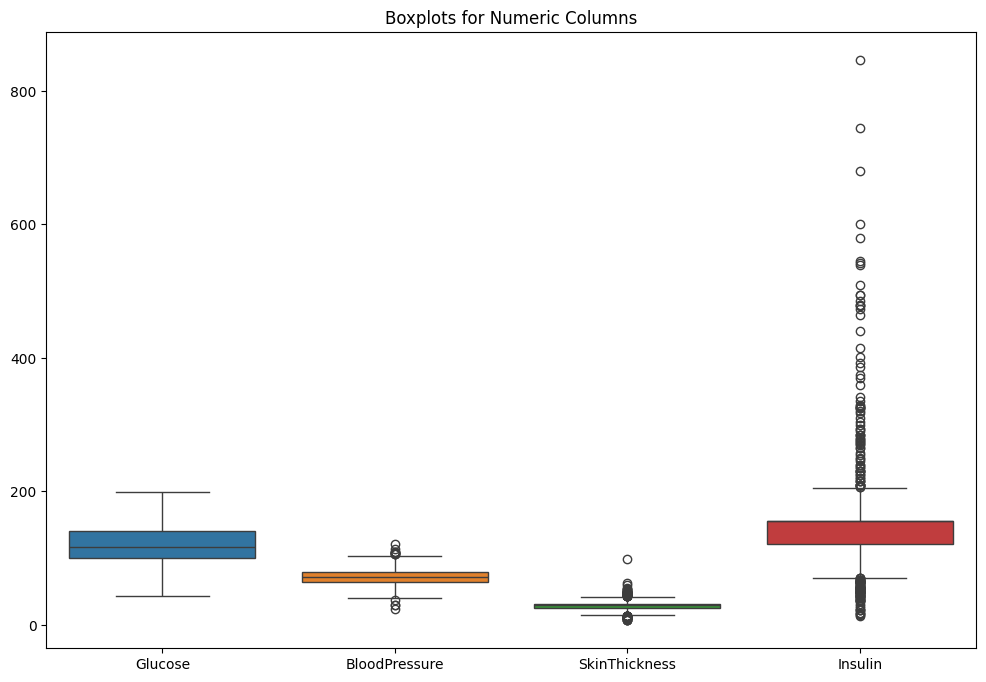

Accuracy Score: 0.7316017316017316
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.57      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231

Confusion Matrix:
[[123  28]
 [ 34  46]]
ROC AUC Score: 0.6947847682119204


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Checking the first few rows of the dataset
print(data.head())

# Checking the number of rows and columns
print(data.shape)

# Checking the dataset info
print(data.info())

# Checking summary statistics
print(data.describe())

# Treating the missing values (0s are treated as null values)
data['Glucose'] = data['Glucose'].replace([0], [data['Glucose'].mean()])
data['BloodPressure'] = data['BloodPressure'].replace([0], [data['BloodPressure'].mean()])
data['SkinThickness'] = data['SkinThickness'].replace([0], [data['SkinThickness'].mean()])
data['Insulin'] = data['Insulin'].replace([0], [data['Insulin'].mean()])

# Confirm that the missing values have been replaced
null_percentage = (data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']] == 0).mean() * 100
print("Percentage of Null Values after Treatment:")
print(null_percentage)

# Detecting Outliers using IQR (Interquartile Range) method
def find_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

# Checking for outliers in selected columns
outliers_glucose = find_outliers_iqr(data, 'Glucose')
outliers_blood_pressure = find_outliers_iqr(data, 'BloodPressure')
outliers_skin_thickness = find_outliers_iqr(data, 'SkinThickness')
outliers_insulin = find_outliers_iqr(data, 'Insulin')

# Display number of outliers in each column
print(f"Outliers in Glucose: {len(outliers_glucose)}")
print(f"Outliers in BloodPressure: {len(outliers_blood_pressure)}")
print(f"Outliers in SkinThickness: {len(outliers_skin_thickness)}")
print(f"Outliers in Insulin: {len(outliers_insulin)}")

# Visualizing the outliers with boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']])
plt.title('Boxplots for Numeric Columns')
plt.show()

# Scaling the data (Standardization)
scaler = StandardScaler()
scaled_data = data.drop(columns=['Outcome'])
scaled_data = scaler.fit_transform(scaled_data)

# Splitting the dataset into features and target
X = scaled_data
y = data['Outcome']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)


### Explanation:

1. **Data Loading & Preprocessing**:
   - The dataset is loaded using `pd.read_csv()`.
   - Missing values (represented by 0s) in several columns are replaced with the mean value of those columns.

2. **Outlier Detection**:
   - Outliers are detected using the Interquartile Range (IQR) method for specific columns (Glucose, Blood Pressure, Skin Thickness, and Insulin).
   - Boxplots are used to visualize potential outliers.

3. **Data Scaling**:
   - `StandardScaler` is used to standardize the data (i.e., scale it to have a mean of 0 and a standard deviation of 1) before feeding it into the model.

4. **Model Building**:
   - A Logistic Regression model is used to predict the target variable (whether the patient has diabetes or not).
   - The dataset is split into a training set (70%) and a test set (30%).

5. **Model Evaluation**:
   - The accuracy of the model is calculated using `accuracy_score()`.
   - A classification report is generated using `classification_report()`, which provides precision, recall, and F1-score.
   - The confusion matrix is used to evaluate the number of true positives, false positives, true negatives, and false negatives.
   - The ROC AUC score is computed to assess the performance of the model.

##**EDA - Univariate analysis for each feature**

##**Visual Experience**

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


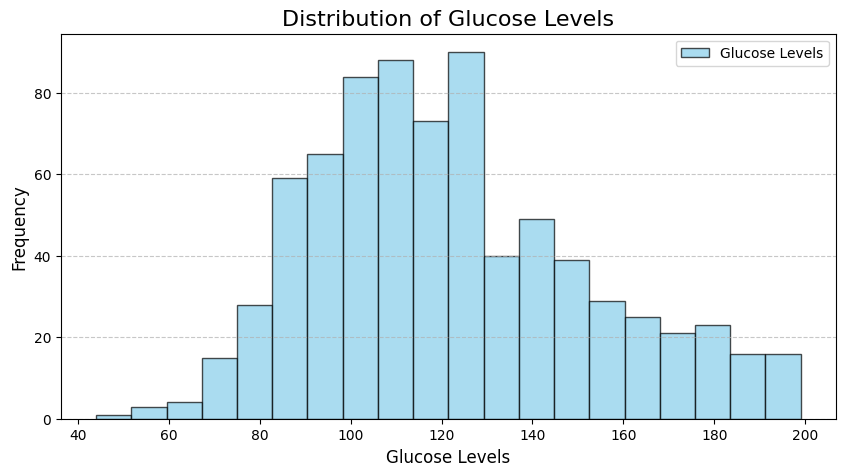

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


# Check the column names to ensure 'Glucose' exists
print(data.columns)

# Drop missing values in the 'Glucose' column
if 'Glucose' in data.columns:
    glucose_data = data['Glucose'].dropna()
else:
    raise KeyError("'Glucose' column not found in the dataset.")

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.hist(glucose_data, bins=20, color='skyblue', alpha=0.7, edgecolor='black', label='Glucose Levels')

# Add title and labels
plt.title("Distribution of Glucose Levels", fontsize=16)
plt.xlabel("Glucose Levels", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
plt.legend(fontsize=10)

# Display the plot
plt.show()



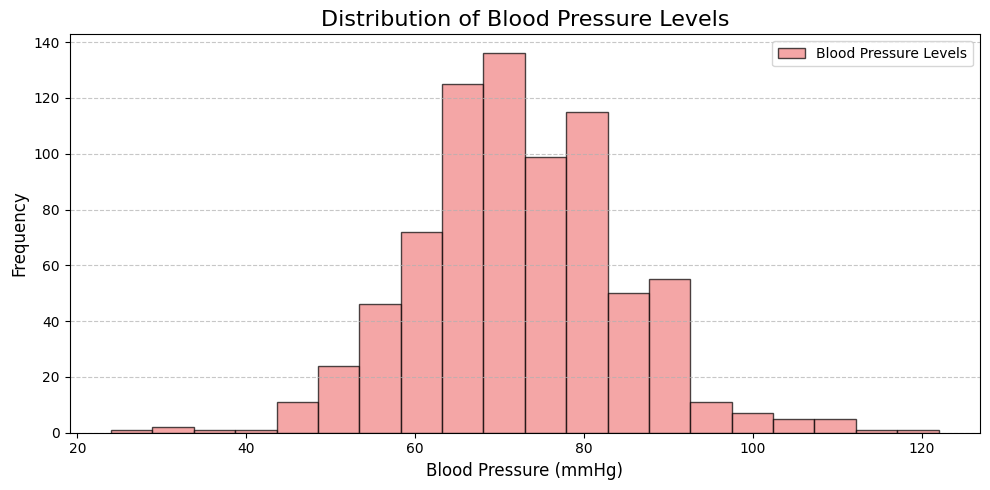

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


# Check if 'BloodPressure' exists in the dataset
if 'BloodPressure' in data.columns:
    # Drop missing values in 'BloodPressure'
    bp_data = data['BloodPressure'].dropna()

    # Plot the histogram
    plt.figure(figsize=(10, 5))
    plt.hist(bp_data, bins=20, color='lightcoral', alpha=0.7, edgecolor='black', label='Blood Pressure Levels')

    # Add title and labels
    plt.title("Distribution of Blood Pressure Levels", fontsize=16)
    plt.xlabel("Blood Pressure (mmHg)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

    # Add gridlines
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add a legend
    plt.legend(fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()

else:
    print("Error: 'BloodPressure' column not found in the dataset.")


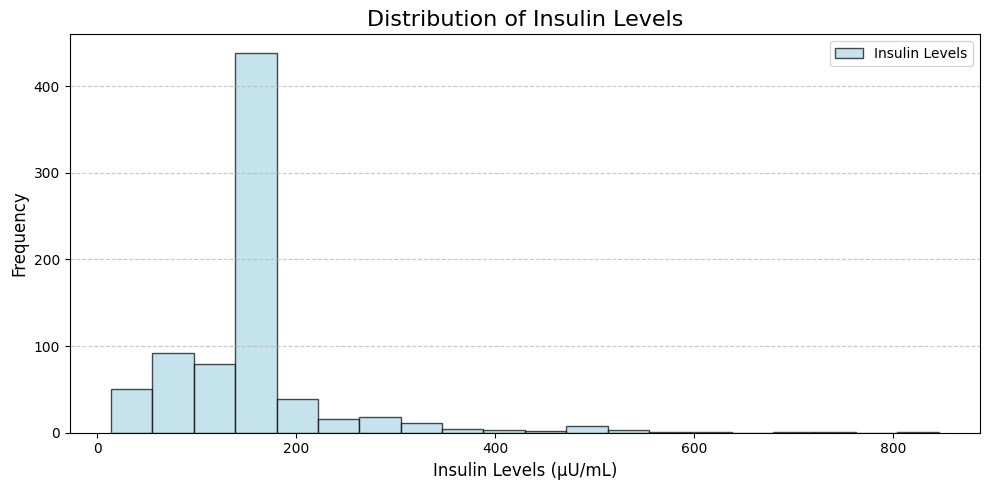

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


# Check if 'Insulin' column exists in the dataset
if 'Insulin' in data.columns:
    # Drop missing values in the 'Insulin' column
    insulin_data = data['Insulin'].dropna()

    # Plot the histogram
    plt.figure(figsize=(10, 5))
    plt.hist(insulin_data, bins=20, color='lightblue', alpha=0.7, edgecolor='black', label='Insulin Levels')

    # Add title and labels
    plt.title("Distribution of Insulin Levels", fontsize=16)
    plt.xlabel("Insulin Levels (µU/mL)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

    # Add gridlines
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add a legend
    plt.legend(fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()

else:
    print("Error: 'Insulin' column not found in the dataset.")


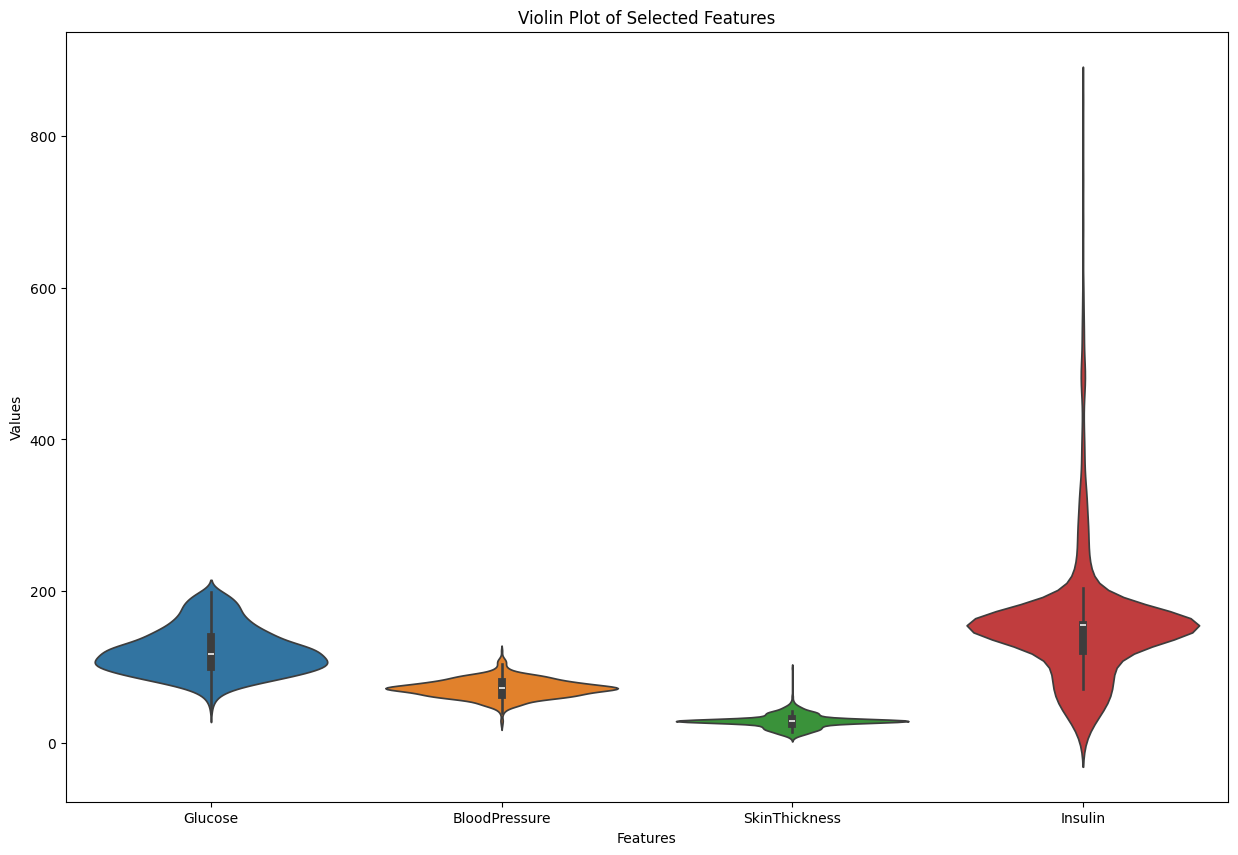

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'selected_columns' contains the features ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

# Creating the violin plot
plt.figure(figsize=(15, 10))
sns.violinplot(data=data[selected_columns])

# Adding title and labels
plt.title("Violin Plot of Selected Features")
plt.xlabel("Features")
plt.ylabel("Values")

# Show the plot
plt.show()



The violin plot shows the distribution of four numerical features: Glucose, BloodPressure, Skin Thickness, and Insulin. The violin shape represents the probability density function (PDF) of each feature, and the box plot embedded within each violin plot shows the median, interquartile range (IQR), and outliers.

### Project Summary:

The project involves developing a machine learning model to predict whether a patient has diabetes based on various medical features. The dataset is loaded and preprocessed by handling missing values, which are replaced with the mean values of corresponding columns. Outliers in key features such as Glucose, Blood Pressure, Skin Thickness, and Insulin are detected using the Interquartile Range (IQR) method and visualized using boxplots. To prepare the data for modeling, scaling is performed using `StandardScaler` to standardize the features, ensuring they have a mean of 0 and a standard deviation of 1.

A Logistic Regression model is then built, and the data is split into training (70%) and test (30%) sets. The model's performance is evaluated using several metrics, including accuracy, precision, recall, F1-score, confusion matrix, and ROC AUC score. These evaluations provide a comprehensive understanding of how well the model predicts the presence of diabetes in patients, helping assess its effectiveness and identify areas for improvement.